# <span style="color:green"> Laboratorio di Simulazione Numerica (NSL) </span>
## <span style="color:blue"> Esercitazione Numerica 1 </span>

### Esercizio 01.1: Test del generatore di numeri pseudo-casuali


Nella prima parte dell'esercitazione viene testato il generatore di numeri pseudo-casuali (scaricato dal sito Ariel del corso) svolgendo tre simulazioni numeriche differenti:
1. Stima del **valor medio** di una variabile casuale distribuita uniformemente nell'intervallo $[0,1]$, accompagnata dalla relativa incertezza statistica.
2. Stima della **varianza** di una variabile casuale distribuita uniformemente nell'intervallo $[0,1]$ accompagnata dalla relativa incertezza statistica.
3. Test statistico della variabile $\chi^2$ per verificare la proprietà di uniformità del generatore.

#### 1) Valore medio

In questo primo test l'**obiettivo** è di verificare statisticamente la seguente *identità*: $\langle r \rangle = \int_0^1 r dr = 1/2$, ovvero il valore medio della funzione $f(r) = r$ nell'intervallo $[0,1]$.

L'espressione precedente calcola il valore di aspettazione di una variabile casuale o stocastica, uniformemnte distribuita nell'intervallo $[0,1]$, intesa come funzione misurabile sullo spazio delle probabilità $(R,B,p(x)dx)$, dove $R$ indica l'insieme dei numeri reali, $B$ la $\sigma$-algebra di Borel generata dagli aperti di $R$ e $p(x)$ la funzione di distribuzione di probabilità della variabile casuale $x$.

A partire dalla definizione nel caso concreto sopra presentato si ha: $$\langle f \rangle = \int_R f(x)p(x)dx =\int_0^1 r dr = 1/2$$
dove $f(x) = r$, $p(x)=1$ nell'intervallo $[0,1]$ e $p(x)=0$ altrimenti e dx=dr.

Il generatore di numeri pseudo-causali per mostrare un grado sufficiente di **casualità**, ossia per essere un buono strumento al servizio dei metodi numerici **Monte Carlo**, nonostante il suo *carattere deterministico*, deve saper generare numeri reali casuali distribuiti uniformemente tra $[0,1]$ che soddisfino la precedente identità entro un'incertezza statistica sempre più accurata all'aumentare del numero di estrazioni.

   - **NOTA**: Per calcolare l'incertezza statistica nei metodi Monte Carlo, intesa come deviazione standard della media $\langle r \rangle$, verrà utilizzato qui e per tutte le successive simulazioni ed esercitazioni il cosiddetto **Blocking Method**  che permette di arginare il problema di eventuali *variabili stocastiche statisticamente correlate*. Per stimare l'incertezza statistica occorre, prima di tutto, determinare il momento centrale secondo (*varianza*) definito come  $\sigma^2_A := \langle (A-\langle A\rangle)^2\rangle = \langle A^2 \rangle -\langle A\rangle^2 $. Ora si supponga di dividere $M$ "steps" Monte Carlo della simulazione (le cui specifiche dipendono da caso a caso) in $N$ blocchi, con $N<M$. In ciascun blocco, si possono sfruttare gli $M/N$ "steps" Monte Carlo per stimare il valore di $A$, dove viene indicato con $A_i$ per $i=1,N$ il valore ottenuto dall'$N$-esimo blocco, e con $A^2_i$ per $i=1,N$ il quadrato di tale valore per ciascun blocco. Il numero $N$ rappresenta dunque, in ultima analisi, il numero di *esperimenti* effettuati.
    Allora sarà possibile stimare il valore medio dei quadrati di $A$ e il quadrato del valore medio di $A$ nel seguente modo:
    $$ \langle A^2 \rangle \simeq \frac{1}{N} \sum_{i=1}^N A^2_i \quad \quad \langle A\rangle^2 \simeq \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 $$
    Infine l'incertezza statistica sarà data dalla seguente  espressione in funzione di $N$ :
    $$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N A^2_i - \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 \right]} $$ 
    
Ora nel test si considerino $M=10^6$ numeri generati casualmente divisi in $N=100$ blocchi e si proceda nel modo seguente:

1. Si stimino i valori medi $x_i$ per ciascun blocco ($i=1,..,N$) a partire dalla generazione dei primi $L=M/N$ numeri casuali uniformemente distribuiti tra $[0,1)$.
2. Si raccolgano tali valori e i loro quadrati, $x_i^2$, in contenitori di dimensione $N$.
3. Si valuti l'effetto cumulativo sommando progressivamente gli $x_i$ e $x_i^2$ per ogni $i$ e all'aumentare del numero dei blocchi si calcoli l'errore associato come deviazione standard dalla media (vedi metodo a blocchi), con l'accortezza di assegnare un valore nullo all'errore quando si tiene conto solo del primo blocco per il quale non avrebbe alcun senso calcolare l'incertezza statistica.  

Qui sotto viene riportato il grafico che mostra l'andamento del valore medio (in realtà $\langle r \rangle-1/2$) con la relativa incertezza statistica, indicata con le barre di errore, all'aumentare progressivo del numero di esperimenti e tenendo conto dell'effetto cumulativo.

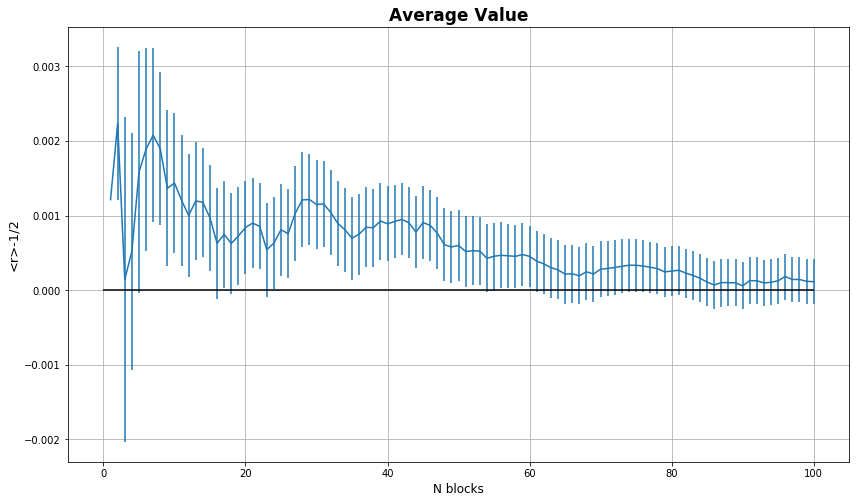

In [36]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

Blocks, average_values, error = np.loadtxt("Results/ave.txt", usecols=(0,1,2), unpack='true')

fig=plt.figure(figsize=(14,8))
plt.errorbar(Blocks, average_values-1/2,yerr=error)
plt.hlines(0,0,100)
plt.xlabel('N blocks', size = '12')
plt.ylabel('<r>-1/2', size = '13')
plt.title("Average Value",  fontsize='17', weight='bold')
plt.grid(True)
plt.show()

- Il plot illustrato mostra una buona *convergenza* al valore atteso di $0.5$ entro una $\sigma$ dopo circa 60 blocchi.
 
- Si noti che progressivamente le barre di errore tendono a coprire un'ampiezza sempre minore come ci si aspetterebbe dall'effeto cumulativo e dalla convergenza prevista. 

#### 2) Varianza

In questo secondo test l'**obiettivo** è di verificare statisticamente la seguente *identità*: $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$.

L'espressione precedente calcola il valore del momento centrale secondo di una variabile casuale o stocastica, uniformemente distribuita nell'intervallo $[0,1]$, intesa come funzione misurabile sullo spazio delle probabilità $(R,B,p(x)dx)$.

A partire dalla defnizione nel caso concreto sopra presentato si ha: $$\sigma^2=\int_R (f(x)-\langle f \rangle)^2 p(x)dx = \int_0^1 (r-1/2)^2 dr = 1/12$$
dove $f(x) = r$, $\langle f \rangle =\langle r \rangle = 1/2$, $p(x)=1$ nell'intervallo $[0,1]$ e $p(x)=0$ altrimenti e $dx=dr$.

Anche in questo secondo test il generatore deve essere in grado di produrre una sequenza di numeri reali casuali tale per cui il calcolo Monte Carlo della varianza restituisca il valore atteso, ottenuto nell'espressione matematicamente corretta, entro un'opportuna incertezza statistica (in questo caso *l'incertezza dell'incertezza*).

Procedendo analogamente a quanto descritto nella precedente sezione, ricordandosi di usare il metodo a blocchi per la stima dell'errore, si generino $M=10^6$ numeri casuali divisi in $N=100$ blocchi per ottenere $N$ stime della variabile $\sigma^2$ (in realtà $\sigma^2-1/12$) riportate su un grafico, qui di seguito mostrato, accompagnato dalle relative barre d'errore, funzione del numero progressivo di esperimenti.

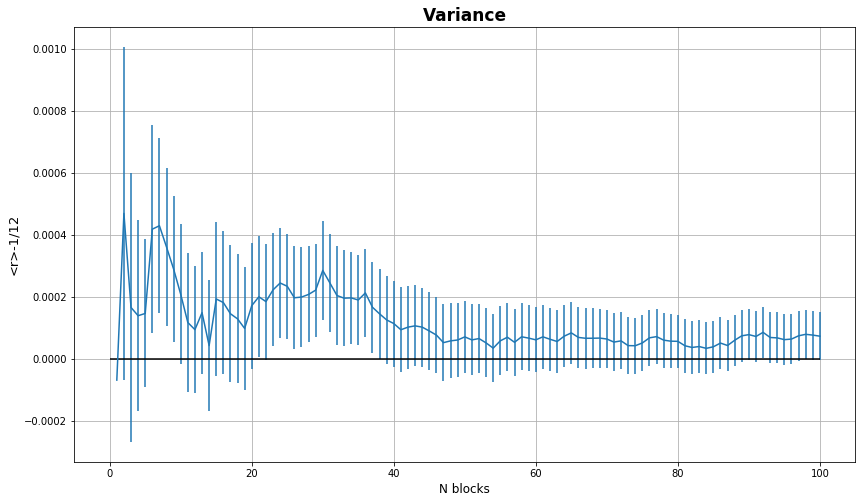

In [37]:
Blocks, variance, error = np.loadtxt("Results/variance.txt", usecols=(0,1,2), unpack='true')

fig=plt.figure(figsize=(14,8))
plt.errorbar(Blocks, variance-1/12,yerr=error)
plt.hlines(0,0,100)
plt.xlabel('N blocks', size = '12')
plt.ylabel('<r>-1/12', size = '13')
plt.title("Variance",  fontsize='17', weight='bold')
plt.grid(True)
plt.show()

- Anche per questa seconda visualizzazione grafica delle stime si possono effettuare considerazioni analoghe al test precedente. 

- L'andamento mostra una buona convergenza al valore atteso 1/12, dopo 40 blocchi entro una deviazione standard dalla media dopo 40 blocchi.

- Si osserva un'oscillazione iniziale non trascurabile dovuta al numero di blocchi ancora esiguo per avere un calcolo Monte Carlo accurato.

- Infine si può concludere che i primi due test hanno validato con successo la proprietà di **casualità** del generatore di numeri pseudo-casuali nel contesto di entrambe le stime Monte Carlo. 



#### 3) Test statistico della variabile $\chi^2$

Per questo terzo test si intende verificare l'ipotesi che i numeri reali $r$ siano effettivamente tratti da una distribuzione uniforme. Quest'ultima ipotesi però non è dimostrabile "direttamente" in quanto il generatore di numeri pseudo-casuali è un algoritmo deterministico. 

L'**obiettivo**, allora, sarà quello di implementare un test, detto test della variabile $\chi^2$, che consenta di stimare con quale probabilità i numeri reali $r$ **non** siano tratti da una distribuzione uniforme. Se si trovasse un valore sufficientemente basso è possibile concludere che il generatore possiede l'indispensabile proprietà di **uniformità**, ossia che la sequenza di variabili casuali (nella sua progressione) copra uniformememnte l'intervallo  $[0,1]$ . 

Per implementare il test partiamo dalla definzione del $\chi^2$ che rappresenta una misura dell'errore tra i valori osservati $O_i$ e quelli attesi $E_i$ : $$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$$

Ora si suddivida l'intervallo $[0,1]$ in $M=100$ sotto-intervalli e per ciascuno si implementi ed esegua il test del $\chi^2$.
Si noti che il valore atteso $E_i$ per ciascun sotto-intervallo dopo aver estratto $n$ numeri casuali, in accordo con la distribuzione uniforme, è uguale a $np = n\times 1/M= n/M$. Allora, usando $n=10^4$ numeri casuali estratti uniformemente nell'intervallo $[0,1]$ si ottiene la seguente formula: $$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
dove l'indice $i$ rappresenta l'$i$-esimo sotto-intervallo.

Ora è lecito aspettarsi che $(n_i - n/M)^2 \simeq n/M$ e dunque che $\chi^2 \simeq 100$ che corrisponde al numero di sotto-intervalli sul quale corre l'indice della sommatoria. Se si dovesse trovare un valore molto più grande significa che il generatore non restituisce numeri distribuiti uniformente in ciascun sotto-intervallo e il test è da considerarsi fallito. 

Si ripeta tale procedura 100 volte calcolando  $\chi^2_j$ per $j=1, ..., 100$ usando insiemi di numeri pseudo-casuali sempre diversi. Supponendo che le procedure siano tra di loro indipendenti, come dovrebbe essere, qui di seguito viene riportato il grafico che dovrebbe mostare le oscillazioni, all'incirca della stessa ampiezza, del valore ottenuto dalla simulazione del $\chi^2$ per ogni esperimento intorno al valore medio stimato 100.

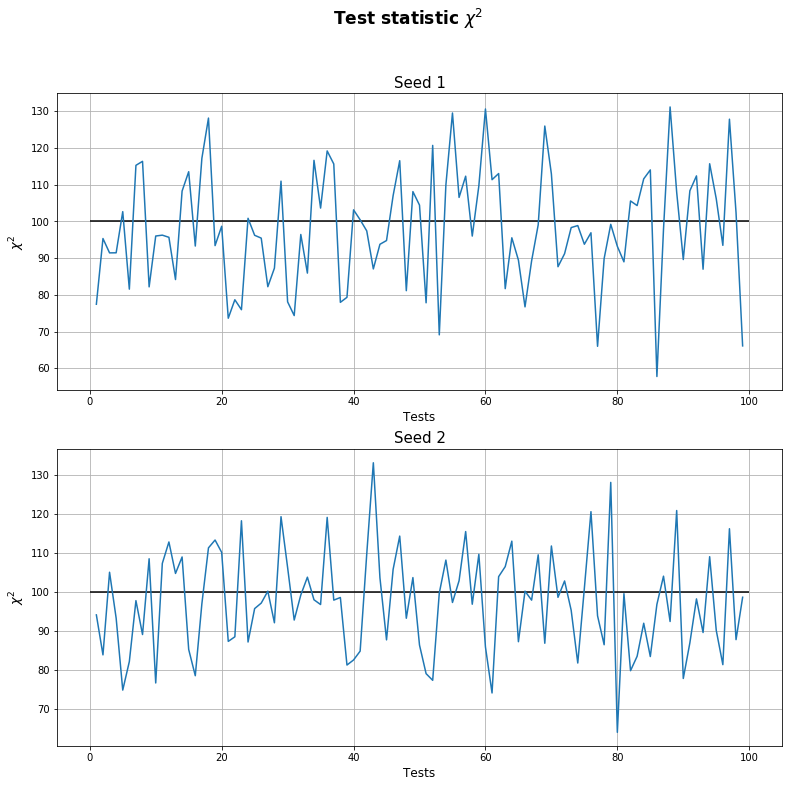

In [38]:
# seed.in: .... 0001
test, chi_2_seed1 = np.loadtxt("Results/chi_2_seed1.txt", usecols=(0,1), delimiter=' ', unpack='true')
# seed.in: .... 0002
test, chi_2_seed2 = np.loadtxt("Results/chi_2_seed2.txt", usecols=(0,1), delimiter=' ', unpack='true')

fig=plt.figure(figsize=(13,12))
plt.suptitle("Test statistic $\chi^2$", fontsize='17', weight='bold')

plt.subplot(211)
plt.errorbar(test, chi_2_seed1,0)
plt.hlines(100,0,100)
plt.title("Seed 1", size='15')
plt.xlabel('Tests', size='12')
plt.ylabel('$\chi^2$', size='13')
plt.grid(True)

plt.subplot(212)
plt.errorbar(test, chi_2_seed2,0)
plt.hlines(100,0,100)
plt.title("Seed 2", size='15')
plt.xlabel('Tests', size='12')
plt.ylabel('$\chi^2$', size='13')
plt.grid(True)

plt.show()

- Si osserva dal grafico che le stime della variabile $\chi^2$ sono distribuite, come atteso, intorno al valore medio $100$.

- Le oscillazioni del valore della variabile $\chi^2$ raggiungono in alcuni esperimenti picchi che potrebbero mettere in  discussione la proprietà di uniformità del generatore di numeri pseudo casuali. Per questo è stato ripetuto il test con due seed differenti.

- Il secondo test mostra delle fluttuazioni più contenute attorno al valore medio $100$ (nonostanet appaiono ancora dei picchi). Comunque si può affermare che il test abbia ragionevolmente validato le proprietà di **uniformità** del generatore di numeri pseudo-casuali.

### Esercizio 01.2: Teorema del Limite Centrale (LCT)

Nella seconda parte di questa esercitazione, prima di tutto, viene arricchito il generatore di numeri casuali precedentemente testato aggiungendo, nello specifico, due metodi per generare variabili casuali distribuite secondo:
1. Una **distribuzione esponenziale** generica con densità di probabilità $p(x) = \lambda exp(-\lambda x)$, $x\in [0,+\infty]$
2. Una **distribuzione di Cauchy-Lorentz** generica con densità di probabilità $p(x) = \frac{1}{\pi} \frac{\Gamma^2}{(x-\mu)^2+\Gamma^2}$ , $x\in [-\infty,+\infty]$

A tal fine viene usato il metodo dell'inversione della *funzione di distribuzione cumulativa* data da $F(x) = \int_{-\infty}^{x} p(x)dx$. 

Assumendo che $y(x)$ sia una variabile estratta da una distribuzione uniforme sull'intervallo $[0,1]$ e imponendo che $F(x) := y(x)$, invertendo l'ultima relazione e sostituendo la funzione di distribuzione di probabilità (pdf) opportuna nell'integrale, otteniamo $x = F^{-1}(y)$ come variabile distribuita secondo la *pdf* cercata in funzione di y.

Nei casi prima citati il calcolo dettagliato restituisce le variabili casuali:
1. $x = -\frac{1}{\pi} ln(1-y)$ distribuita secondo una *esponenziale*
2. $x = \Gamma tan[\pi(y-1/2)]+\mu$ distibuita secondo una *Cauchy-Lorentz*

Questo metodo è di immediato utilizzo per il campionamento di una data pdf se si è in grado di calcolarne analiticamente la funzione cumulativa e di invertirla, altrimenti sono richiesti degli accorgimenti, come le formule di **Box-Muller** che restituiscono una variabile distribuita secondo la pdf di una gaussiana.

L'obiettivo principale di questa parte è verificare l'enunciato del **Teorema del limite Centrale** (LTC).

Esso afferma che la funzione di distribuzione di probabilità assocciata alla variabile somma (o media) $ S_N = \frac{1}{N} \sum i^N x_i $ di $N$ variabili casuali *statisticamente indipendenti* ed *ugualmente distribuite* tende, all'aumentare di $N$, alla distribuzione Gaussiana per qualunque insieme di variabili con distribuzione avente varianza finita. $$ P_N(S_N) \rightarrow \frac{1}{\sqrt{2\pi(\sigma_{S_N})^2}} exp[-\frac{(S_N-\mu)^2}{2(\sigma_{S_N})^2}]  per  N \rightarrow +\infty$$

Per raggiungere lo scopo vengono riportati, qui sotto, 4 istogrammi ottenuti riempendoli con $M=10^4$ realizzazioni della variabile somma $S(N)$ con, rispettivamente, $N=1,2,10,100$ numero di variabili casuali campionate lanciando rispettivamente:

1. Un **dado standard** che campiona uniformemente numeri reali generati casualmente nell'intervallo $[0.5,6.5)$
2. Un **dado esponenziale** con tasso di decadimento $\lambda=1$
3. Un **dado lorenziano** con parametri $\mu=0$ e $\Gamma=1$

Si deve attendere che nei primi due casi la variabile somma, al crescere di $N$, segua la distribuzione di una Gaussiana, come previsto dal LTC. Tale conclusione verificherebbe anche la proprietà della pdf Gaussiana di essere un attrattore nello spazio delle funzioni di distribuzioni di probabilità. Per il terzo caso bisogna invece attendersi un esito negativo in quanto anche la pdf di Cauchy-Lorenz è un attrattore. Il teorema di **Levy**, infatti, afferma che una densità di probabilità $L(x)$ è una distribuzione limite della somma di variabili casuali indipendenti ed ugualmente distribuite se è *stabile*, ossia se è invariante per *convoluzione*. 

Sia la pdf Gaussiana sia quella di Cauchy-Lorentz sono stabili.


**1) Dado Standard**

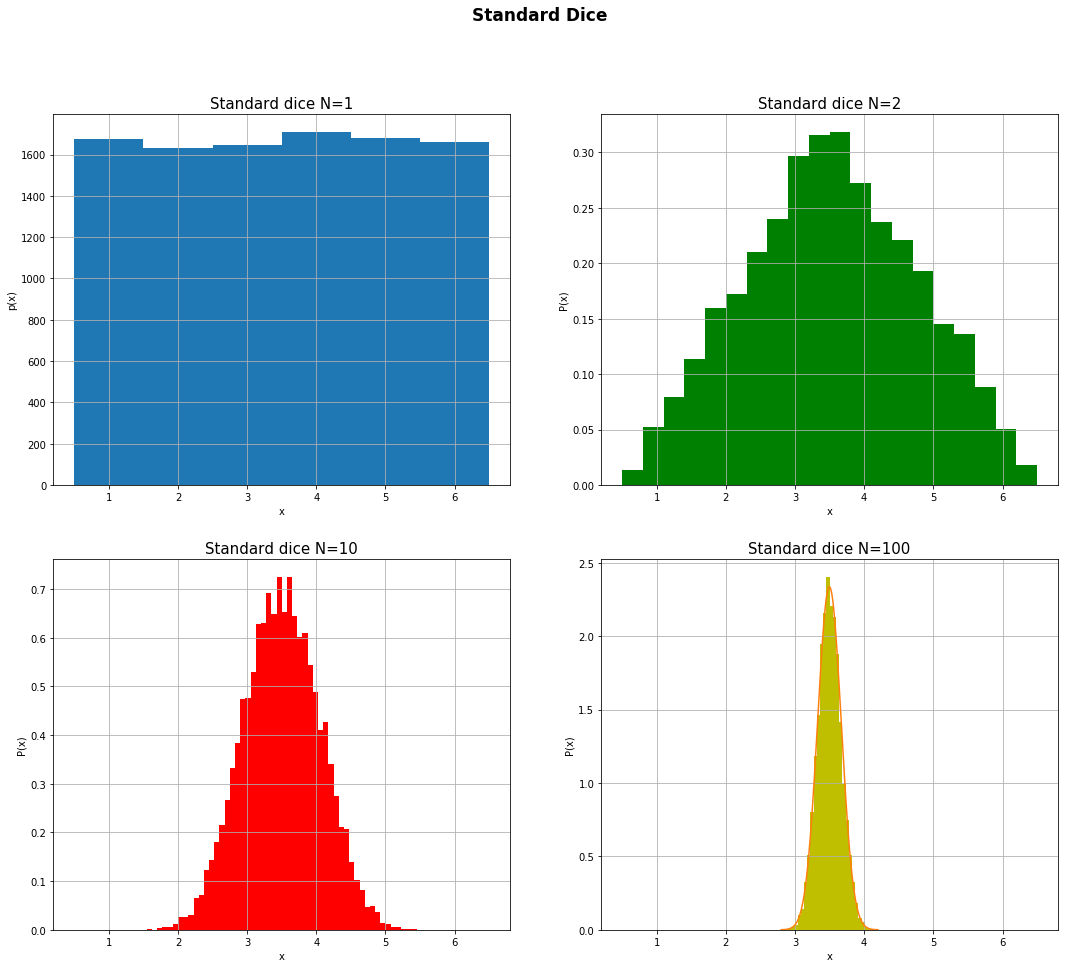

In [39]:
from scipy.stats import norm

#Standard Dice
st1 = np.loadtxt("Results/st1.txt", usecols=(1), delimiter='  ', unpack='true')
st2 = np.loadtxt("Results/st2.txt", usecols=(1), delimiter='  ', unpack='true')
st10 = np.loadtxt("Results/st10.txt", usecols=(1), delimiter='  ', unpack='true')
st100 = np.loadtxt("Results/st100.txt", usecols=(1), delimiter='  ', unpack='true')

fig=plt.figure(figsize=(18,15))
plt.suptitle("Standard Dice", fontsize='17', weight='bold')

plt.subplot(221)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title("Standard dice N=1",size='15')
n, bins, patches = plt.hist(st1, 6, range=(0.5,6.5))
plt.grid(True)


plt.subplot(222)
plt.xlabel('x')
plt.ylabel('P(x)')
plt.title('Standard dice N=2',size='15')
n, bins, patches = plt.hist(st2, 20, density=True, facecolor='g', range=(0.5,6.5))
plt.grid(True)


plt.subplot(223)
plt.xlabel('x')
plt.ylabel('P(x)')
plt.title('Standard dice N=10',size='15')
n, bins, patches = plt.hist(st10, 80, density=True, facecolor='r', range=(0.5,6.5))
plt.grid(True)


plt.subplot(224)
plt.xlabel('x')
plt.ylabel('P(x)')
plt.title('Standard dice N=100',size='15')
n, bins, patches = plt.hist(st100, 130, density=True, facecolor='y', range=(0.5,6.5))
plt.grid(True)

#Fit
parameter = norm.fit(st100)
x = np.linspace(2.8,4.2,130)
y = norm.pdf(x, *parameter)
plt.plot(x,y)


plt.show()


**2) Dado Esponenziale**

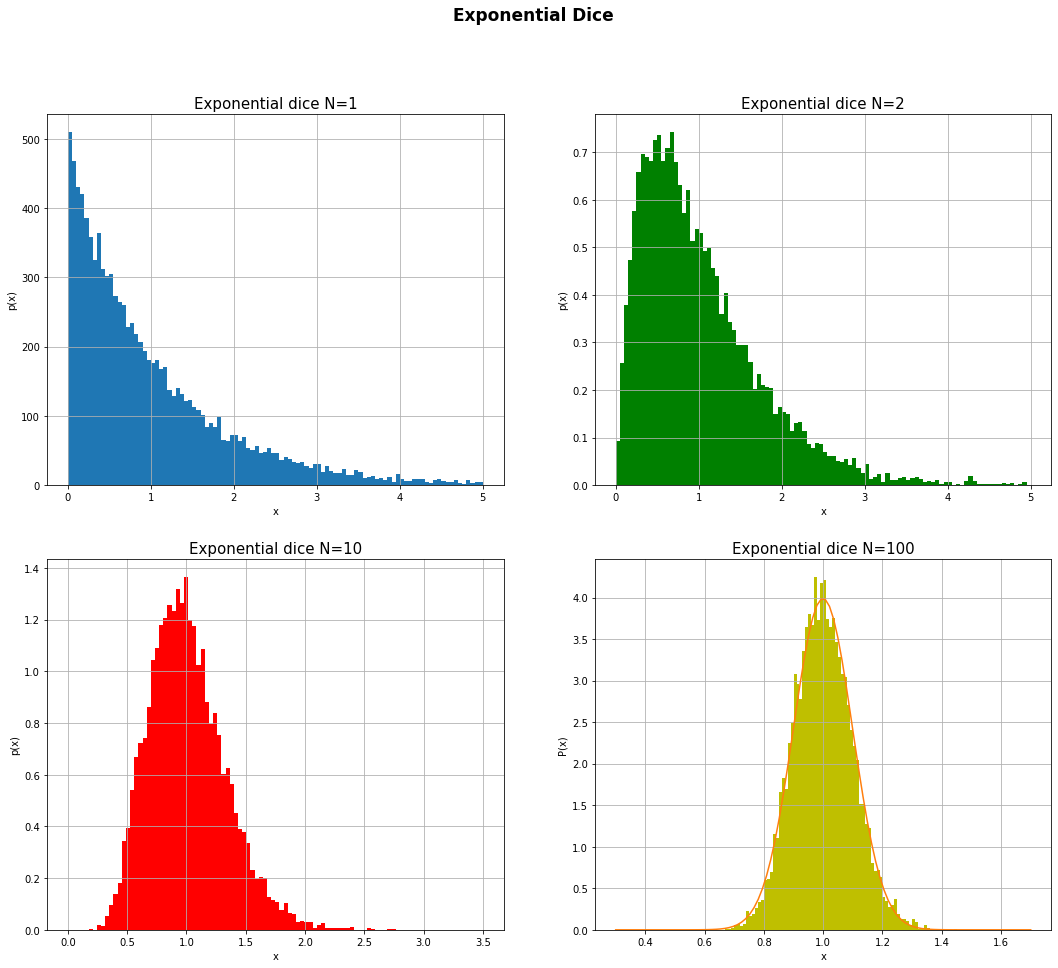

In [40]:
from scipy.optimize import curve_fit
from scipy.stats import norm

#exponential dice
exp1 = np.loadtxt("Results/exp1.txt", usecols=(1), delimiter='  ', unpack='true')
exp2 = np.loadtxt("Results/exp2.txt", usecols=(1), delimiter='  ', unpack='true')
exp10 = np.loadtxt("Results/exp10.txt", usecols=(1), delimiter='  ', unpack='true')
exp100 = np.loadtxt("Results/exp100.txt", usecols=(1), delimiter='  ', unpack='true')

fig=plt.figure(figsize=(18,15))
plt.suptitle("Exponential Dice", fontsize='17', weight='bold')

plt.subplot(221)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title("Exponential dice N=1",size='15')
n, bins, patches = plt.hist(exp1, 100, range=(0,5))
plt.grid(True)


plt.subplot(222)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title("Exponential dice N=2",size='15')
n, bins, patches = plt.hist(exp2, 100, density=True, facecolor='g', range=(0,5))
plt.grid(True)


plt.subplot(223)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title("Exponential dice N=10",size='15')
n, bins, patches = plt.hist(exp10, 100, density=True, facecolor='r', range=(0,3.5))
plt.grid(True)


plt.subplot(224)
plt.xlabel('x')
plt.ylabel('P(x)')
plt.title('Exponential dice N=100',size='15')
n, bins, patches = plt.hist(exp100, 100, density=True, facecolor='y', range=(0.5,1.5))
plt.grid(True)

parameter = norm.fit(exp100)
x = np.linspace(0.3,1.7,100)
y = norm.pdf(x, *parameter)
plt.plot(x,y)


plt.show()


**3) Dado Lorenziano**

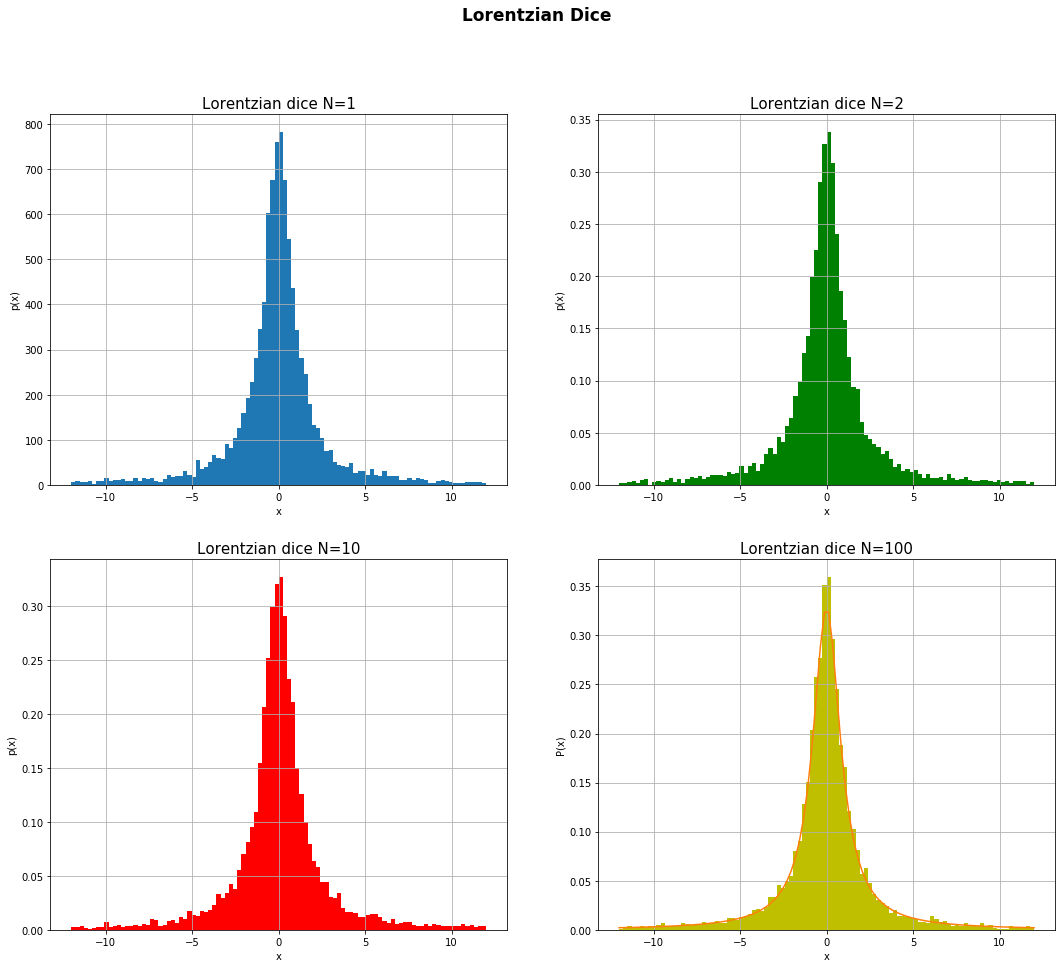

In [41]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import cauchy

cl1 = np.loadtxt("Results/cl1.txt", usecols=(1), delimiter='  ', unpack='true')
cl2 = np.loadtxt("Results/cl2.txt", usecols=(1), delimiter='  ', unpack='true')
cl10 = np.loadtxt("Results/cl10.txt", usecols=(1), delimiter='  ', unpack='true')
cl100 = np.loadtxt("Results/cl100.txt", usecols=(1), delimiter='  ', unpack='true')

fig=plt.figure(figsize=(18,15))
plt.suptitle("Lorentzian Dice", fontsize='17', weight='bold')

plt.subplot(221)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title("Lorentzian dice N=1",size='15')
n, bins, patches = plt.hist(cl1, 100, range=(-12,12))
plt.grid(True)


plt.subplot(222)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title("Lorentzian dice N=2",size='15')
n, bins, patches = plt.hist(cl2, 100, density=True, facecolor='g', range=(-12,12))
plt.grid(True)


plt.subplot(223)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title("Lorentzian dice N=10",size='15')
n, bins, patches = plt.hist(cl10, 100, density=True, facecolor='r', range=(-12,12))
plt.grid(True)


plt.subplot(224)
plt.xlabel('x')
plt.ylabel('P(x)')
plt.title('Lorentzian dice N=100',size='15')
n, bins, patches = plt.hist(cl100, 100, density=True, facecolor='y', range=(-12,12))
plt.grid(True)

parameter = cauchy.fit(cl100)
x = np.linspace(-12,12,100)
y = cauchy.pdf(x, *parameter)
plt.plot(x,y)


plt.show()


- Gli istogrammi confermano in modo soddisfacente le predizioni teoriche e verificano la bontà del **Teorema del limite centrale**.

- Si noti la progressiva evoluzione dal primo caso, con $N=1$, dove viene riprodotta la pdf della variabile casuale iniziale fino all'ultimo caso, $N=100$, che riproduce l'andamento, oppurtunamente fittato negli istogrammi, di una pdf Gaussiana per il dado standard ed esponenziale e una pdf di cauchy per il dado lorentziano, confermando il Teorema di Levy.

### Esercizio 01.3  Esperimento di Buffon

L'**obiettivo** di quest'ultima parte è stimare il valore di $\pi$ simulando l'**esperimento di Buffon**.

Si consideri un'asta di lunghezza fissata $L$ lanciata casualmente su un piano orizzontale contrassegnato da linee rette parallele separatee una dall'altra da uno spazio $d$, tale che $d > L$, ma non con $d\gg L$ altrimenti si ha $P\ll 1$. La probabilità $P$ che l'asta cada su una delle linee, e non nello spazio fra di esse senza intersecarle, è pari a $P = 2L/\pi d$.

Questo esperimento può essere usato per stimare il valore di $\pi$ con un metodo Monte Carlo di tipo *Hit or Miss*; infatti se indichiamo con $N_{thr}$ il numero di lanci totale e con $N_{hit}$ il numero delle volte che l'asta colpisce una linea, si può stimare che:
$$
\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}
$$

Per simulare tale esperimento nel file *input.dat*, letto in fase di inizializzazione dal programma, sono stati settati i seguenti parametri: $L = 2$ e $d = 6$. Sfruttando la simmetria del sistema sopra descritto, infatti la griglia è invariante sotto traslazione di un multiplo intero $d$ (lungo la coordinata y per esempio), si pone il sistema di riferimento, senza perdità di generaltà, in modo tale che la retta $y = 0$ coincida con una delle righe equivalenti del piano su cui viene lanciata l'asta. Tale linea sarà preso come unico riferimento per l'esperimento.

Ora si suppopone che il centro dell'asta possa cadere nell'intervallo di larghezza d sull'asse delle y $[-\frac{d}{2},\frac{d}{2}]$ e tale coordinata viene generata casualmente, in questo intervallo, in modo uniformemente distribuito. Ogni asta lanciata è caratterizzata, oltre che dalla posizione del suo centro nella griglia, dall'inclinazione rispetto alle linee orizzontali (e quindi rispetto all'asse x del sistema di riferimento). Tale **angolo di inclinazione** $\theta$ è il risultato del campionamento uniforme, mediante la tecnica del *rigetto*, di un angolo nell'intervallo $[0,\pi]$ che viene ottenuto generando in modo uniforme punti $(x,y)$ all'interno della metà di un semiquadrato di lato unitario e verificando quali di questi punti estratti cada nella semicirconferenza iscritta. In questo modo l'angolo polare risulta uguale alla seguente espressione:
$$
\theta = sin^{-1}(\frac{y}{\sqrt{x^2 + y^2}})
$$
Tale metodo di campionameno è stato inserito come nuovo metodo nella classe *Random*.

Nota la posizione del centro dell'asta e la sua inclinazione rimane solo da verificare se interseca la linea orizzontale, ossia l'asse delle x. Tale condizione se verificata porta ad un incremento della variabile $N_{hit}$.


Vengono simulati $M=2*10^5$ lanci divisi su $N=100$ blocchi per stimare $N$ valori di $\pi$ con un'incertezza statistica calcolata con il *blocking method*.

Qui di seguito riportiamo il grafico con il valore stimato di $\pi$ in funzione del numero di blocchi della simulazione con le corrisponedenti barre d'errore.

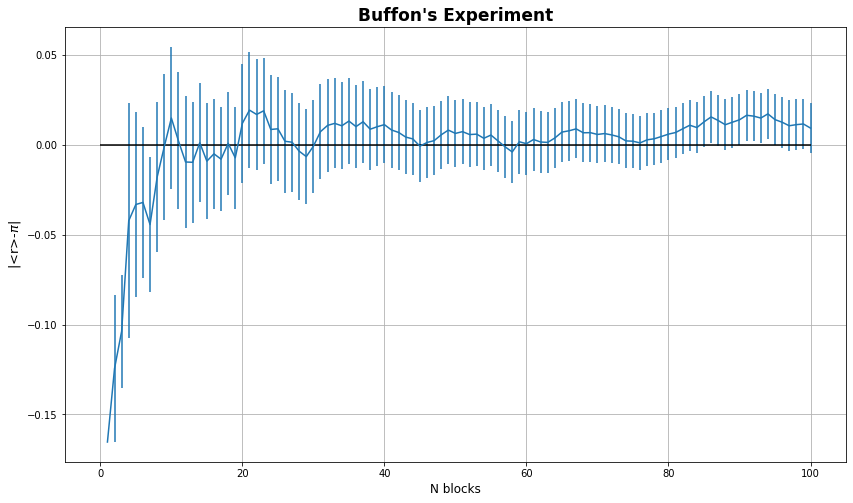

In [42]:
import math

Blocks, Pigreco, error = np.loadtxt("Results/pigreco.txt", usecols=(0,2,3), unpack='true')

fig=plt.figure(figsize=(14,8))
plt.errorbar(Blocks, Pigreco-math.pi,yerr=error)
plt.hlines(0,0,100)
plt.title("Buffon's Experiment", fontsize='17', weight='bold')
plt.xlabel('N blocks' , size = '12')
plt.ylabel('|<r>-$\pi$|', size = '13')
plt.grid(True)

plt.show()

- Si noti la buona convergenza delle stime ll'aumentare del numero di blocchi, dopo le sottostime iniziali, al valore atteso di $\pi$ entro una deviazione standard dalla media.

- L'accuratezza dell'esito di tale esperimento mostra la potenza impressionate dei metodi di campionamento statistico e dei metodi di calcolo numerico Monte Carlo.